# Genetic Operators
This notebook demonstrates the effect of the genetic operators used in `NSGA2Generator` by sampling their output and plotting the resulting probability density functions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from xopt.generators.ga.operators import SimulatedBinaryCrossover, PolynomialMutation

## Polynomial Mutation
In this section, we perform polynomial mutation on mock problem with decision variable bounds of `[-1, 1]` and with the value of the original decision variables set to one of several locations. This allows us to plot the probability density function of the operator's output.

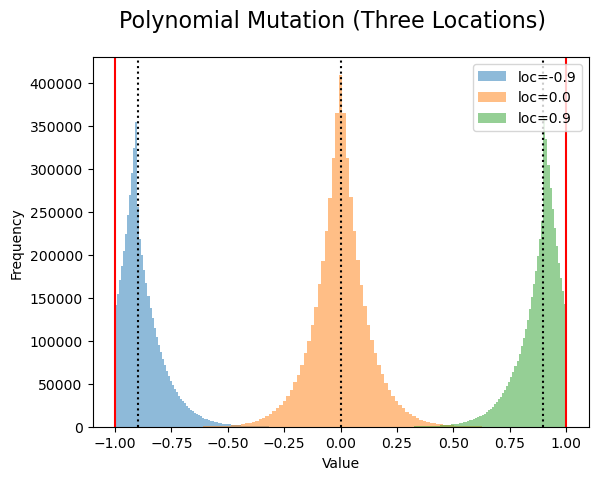

In [2]:
# Settings for the run
num_vars = 512
num_individuals = 10240
eta_m = 20

# Create subplots for visualization
fig, axs = plt.subplots(1, 1)
fig.suptitle("Polynomial Mutation (Three Locations)", fontsize=16)

for idx, loc in enumerate([-0.9, 0.0, 0.9]):
    # Define bounds (all variables between -1 and 1)
    bounds = np.array([[-1.0] * num_vars, [1.0] * num_vars])

    # Create mutation operators
    polynomial_mut = PolynomialMutation(pm=1, eta_m=eta_m)

    # Generate initial population
    population = np.full((num_individuals, num_vars), loc)

    # Mutate population using both operators
    poly_mutated_xopt = np.array([polynomial_mut(ind, bounds) for ind in population])

    # Original distribution
    plt.hist(poly_mutated_xopt.ravel(), bins=128, alpha=0.5, label=f"loc={loc:.1f}")
    plt.axvline(loc, c="k", ls=":")

plt.axvline(-1, c="r")
plt.axvline(1, c="r")

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()

## Simulated Binary Crossover
We now demonstrate the probability density function of the output from simulated binary crossover.
Two individuals with decision variables set to some particular value are crossed over for a mock problem with decision variable bounds of `[-1, 1]`.

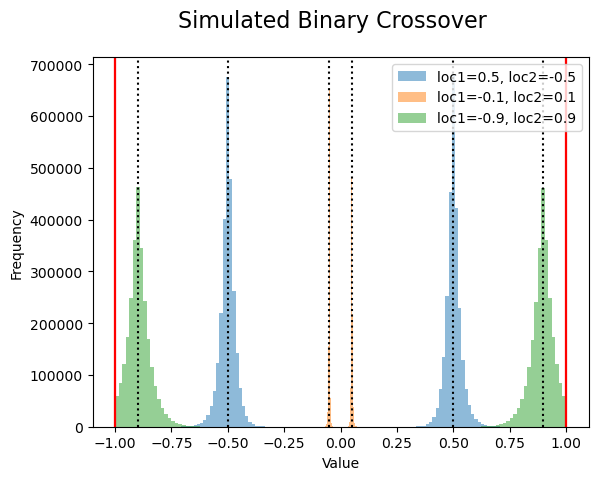

In [3]:
def plot_sbx(
    num_vars=512,
    num_individuals=10240,
    loc1=0.5,
    loc2=-0.5,
    eta_c=20,
    delta_1=1,
    delta_2=0.5,
):
    # Create subplots for visualization
    plt.suptitle("Simulated Binary Crossover", fontsize=16)

    # Define bounds (all variables between -1 and 1)
    bounds = np.array([[-1.0] * num_vars, [1.0] * num_vars])

    # Create mutation operators
    sbx = SimulatedBinaryCrossover(delta_1=delta_1, delta_2=delta_2, eta_c=eta_c)

    # Generate initial population
    population1 = np.full((num_individuals, num_vars), loc1)
    population2 = np.full((num_individuals, num_vars), loc2)

    # Mutate population using both operators
    poly_mutated_xopt = np.array(
        [sbx(ind1, ind2, bounds)[0] for ind1, ind2 in zip(population1, population2)]
    )

    # Original distribution
    plt.hist(
        poly_mutated_xopt.ravel(),
        bins=128,
        alpha=0.5,
        label=f"loc1={loc1:.1f}, loc2={loc2:.1f}",
    )
    plt.axvline(loc1, c="k", ls=":")
    plt.axvline(loc2, c="k", ls=":")

    plt.axvline(-1, c="r")
    plt.axvline(1, c="r")

    plt.xlabel("Value")
    plt.ylabel("Frequency")


# Plot for several locations
plot_sbx()
plot_sbx(loc1=-0.05, loc2=0.05)
plot_sbx(loc1=-0.9, loc2=0.9)
plt.legend(loc="upper right")